# Prediction Using Supervised ML

### Predict the percentage of an student based on the no. of study hours

### Name : Mohamed Ahmed Abd EL-mgeed

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,median_absolute_error,r2_score
%matplotlib inline


In [2]:
# Reading data 
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


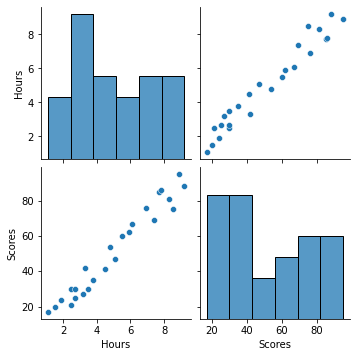

In [3]:
# Plotting the distribution of scores
sns.pairplot(df)

### spliting data

In [4]:
x=df['Hours'].values
y=df['Scores'].values

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0) 

In [6]:
x_train.shape

(20,)

In [7]:
# reshape data to get fitted by model
x_train=x_train.reshape(-1,1)
y_train=y_train.reshape(-1,1)
x_test=x_test.reshape(-1,1)
y_test=y_test.reshape(-1,1)

### Training the LR Model & The evaluation of it 

In [8]:
model = LinearRegression()  
model.fit(x_train.reshape(-1,1),y_train.reshape(-1,1))
y_pred = model.predict(x_test)
print("Evaluation")
print(f'MAE value is  : {mean_absolute_error(y_test, y_pred)}')
print(f'MSE value is  : {mean_squared_error(y_test, y_pred)}')
print(f'MdSE value is  : {median_absolute_error(y_test, y_pred)}')
print(f'R2 value is  : {r2_score(y_test, y_pred, multioutput="variance_weighted")}')

Evaluation
MAE value is  : 4.183859899002975
MSE value is  : 21.5987693072174
MdSE value is  : 3.2051987569597244
R2 value is  : 0.9454906892105356


### Comparing Actual vs Predicted

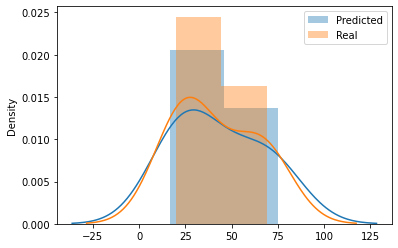

In [9]:
sns.distplot(y_pred,label="Predicted")
sns.distplot(y_test,label="Real")
plt.legend()

In [10]:
# Testing our data on model
hours = np.array([9.5])
own_pred = model.predict(hours.reshape(-1, 1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [9.5]
Predicted Score = [96.16939661]
